# Testing TrymFEM Library

This notebook demonstrates the use of the TrymFEM library for solving different types of PDEs using finite element methods. We'll test:

1. A simple Poisson equation with constant source term (f=1)
2. A smooth, interesting problem with a sinusoidal source term
3. A complex problem with special functions and combined solutions

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from TrymFEM import Mesh1D, PoissonSolver, compute_error, convergence_analysis, print_convergence_table
from scipy import special
from scipy.interpolate import interp1d

# Try to import scienceplots for better visualization, but continue if not available
try:
    import scienceplots
    plt.style.use('science')
except ImportError:
    print("scienceplots not found - using default style")

## 1. Simple Poisson Problem (f=1)

We solve the problem:
$$-u''(x) = 1, \quad x \in (0,1), \quad u(0) = u(1) = 0$$

The exact solution is $u(x) = \frac{x(1-x)}{2}$

Elements:   4 | h=2.50e-01 | L2: 5.51e-17 | H1: 1.80e-16 | Linf: 8.33e-17 | Orders: (first mesh)
Elements:   8 | h=1.25e-01 | L2: 5.57e-16 | H1: 1.84e-15 | Linf: 8.33e-16 | Orders: L2=-3.34, H1=-3.35, Linf=-3.32
Elements:  16 | h=6.25e-02 | L2: 2.78e-15 | H1: 9.15e-15 | Linf: 3.97e-15 | Orders: L2=-2.32, H1=-2.32, Linf=-2.25
Elements:  32 | h=3.12e-02 | L2: 1.13e-14 | H1: 3.74e-14 | Linf: 1.60e-14 | Orders: L2=-2.03, H1=-2.03, Linf=-2.01
Elements:  64 | h=1.56e-02 | L2: 4.41e-14 | H1: 1.45e-13 | Linf: 6.20e-14 | Orders: L2=-1.96, H1=-1.96, Linf=-1.95
Elements: 128 | h=7.81e-03 | L2: 1.69e-13 | H1: 5.56e-13 | Linf: 2.37e-13 | Orders: L2=-1.94, H1=-1.94, Linf=-1.93
Elements: 256 | h=3.91e-03 | L2: 6.84e-13 | H1: 2.25e-12 | Linf: 9.63e-13 | Orders: L2=-2.02, H1=-2.02, Linf=-2.02


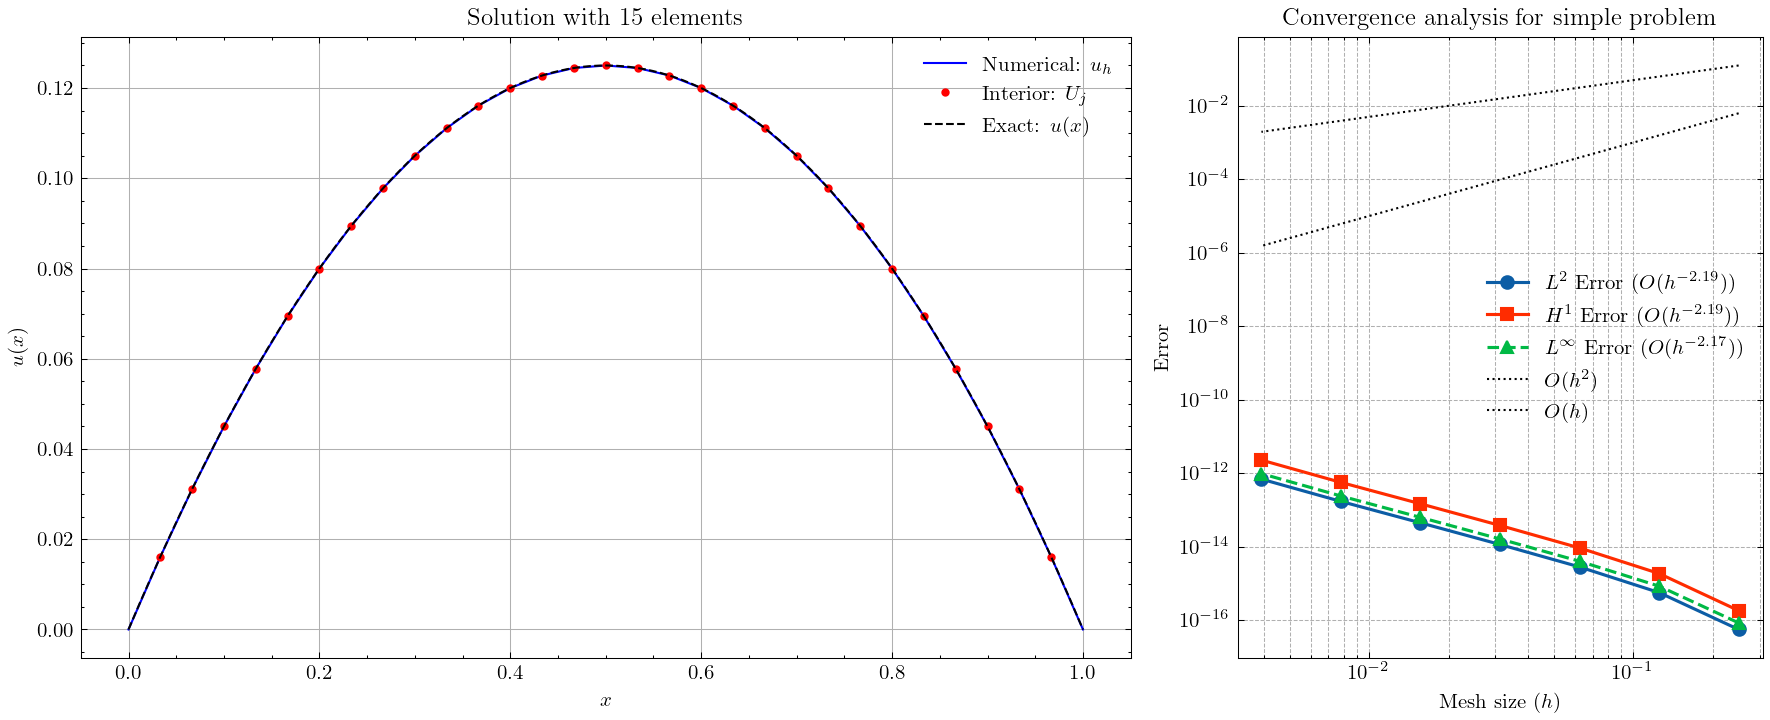

In [2]:
# Define the simple problem
def constant_one(x):
    """Simple constant source term"""
    return np.ones_like(x)

def simple_exact(x):
    """Exact solution for f=1 with zero boundary"""
    return 0.5 * x * (1 - x)

# Create a common mesh for all problems to ensure compatibility for later operations
common_mesh = Mesh1D(4, domain=(0, 1))

# Create solver using the common mesh
simple_solver = PoissonSolver(common_mesh, constant_one)

# Solve the problem
x_int, u_int = simple_solver.solve()
x_simple, u_simple = simple_solver.get_full_solution()

fig = convergence_analysis(constant_one, simple_exact, ns=[4, 8, 16, 32, 64,128, 256],title='Convergence analysis for simple problem',M=15)
fig.savefig('figures/convergence_simple.png', dpi=300, bbox_inches='tight')

## 2. Smooth and Interesting Problem

We solve the problem:
$$-u''(x) = \pi^2 \sin(\pi x), \quad x \in (0,1), \quad u(0) = u(1) = 0$$

The exact solution is $u(x) = \sin(\pi x)$


                                             CONVERGENCE ANALYSIS                                             
M        | h            | L² Error        | Rate     | L∞ Error        | Rate     | H¹ Error        | Rate    
---------+--------------+-----------------+----------+-----------------+----------+-----------------+---------
4        | 2.50e-01     | 9.73e-05        | --       | 1.80e-04        | --       | 3.13e-04        | --      
8        | 1.25e-01     | 6.17e-06        | 3.98     | 1.21e-05        | 3.89     | 2.02e-05        | 3.96    
16       | 6.25e-02     | 3.87e-07        | 4.00     | 7.70e-07        | 3.97     | 1.27e-06        | 3.99    
32       | 3.12e-02     | 2.42e-08        | 4.00     | 4.83e-08        | 3.99     | 7.97e-08        | 4.00    
64       | 1.56e-02     | 1.51e-09        | 4.00     | 3.02e-09        | 4.00     | 4.98e-09        | 4.00    
128      | 7.81e-03     | 9.36e-11        | 4.01     | 1.87e-10        | 4.01     | 3.09e-10        | 4.01    


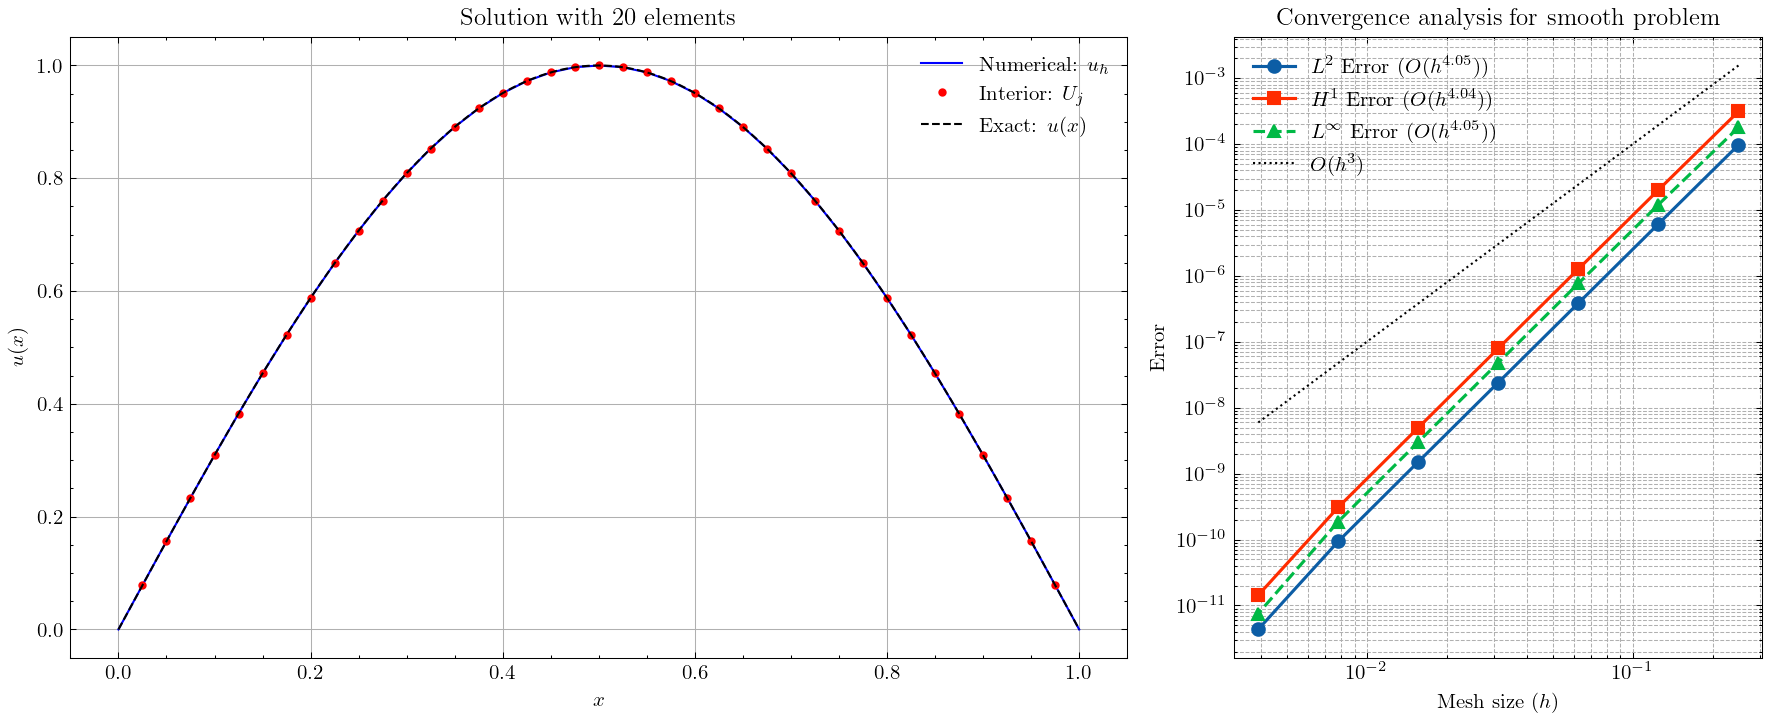

In [3]:
# Define the smooth problem
def sin_source(x):
    """Sinusoidal source term"""
    return np.pi**2 * np.sin(np.pi * x)

def sin_exact(x):
    """Exact solution for sinusoidal source"""
    return np.sin(np.pi * x)

# Create solver with the SAME mesh as the simple problem
smooth_solver = PoissonSolver(common_mesh, sin_source)

# Solve the problem
x_smooth, u_smooth = smooth_solver.get_full_solution()

print_convergence_table(PoissonSolver, sin_exact, sin_source, M_list=[4, 8, 16, 32, 64, 128])
fig = convergence_analysis(sin_source, sin_exact, ns=[4, 8, 16, 32, 64,128, 256],title='Convergence analysis for smooth problem',M=20)
fig.savefig('figures/convergence_smooth.png', dpi=300, bbox_inches='tight')

## 3. Complex Problem with Special Functions

We solve a more complex problem with a source term involving Bessel functions:

$$-u''(x) = J_0(5\pi x), \quad x \in (0,1), \quad u(0) = u(1) = 0$$

where $J_0$ is the Bessel function of the first kind of order 0.

Elements:   4 | h=2.50e-01 | L2: 3.48e-05 | H1: 2.61e-04 | Linf: 5.84e-05 | Orders: (first mesh)
Elements:   8 | h=1.25e-01 | L2: 4.67e-06 | H1: 6.42e-05 | Linf: 1.04e-05 | Orders: L2=2.90, H1=2.02, Linf=2.48
Elements:  16 | h=6.25e-02 | L2: 3.17e-07 | H1: 5.70e-06 | Linf: 8.72e-07 | Orders: L2=3.88, H1=3.49, Linf=3.58
Elements:  32 | h=3.12e-02 | L2: 2.02e-08 | H1: 4.54e-07 | Linf: 5.95e-08 | Orders: L2=3.97, H1=3.65, Linf=3.87
Elements:  64 | h=1.56e-02 | L2: 1.27e-09 | H1: 3.66e-08 | Linf: 3.80e-09 | Orders: L2=3.99, H1=3.63, Linf=3.97
Elements: 128 | h=7.81e-03 | L2: 7.93e-11 | H1: 3.04e-09 | Linf: 2.39e-10 | Orders: L2=4.00, H1=3.59, Linf=3.99


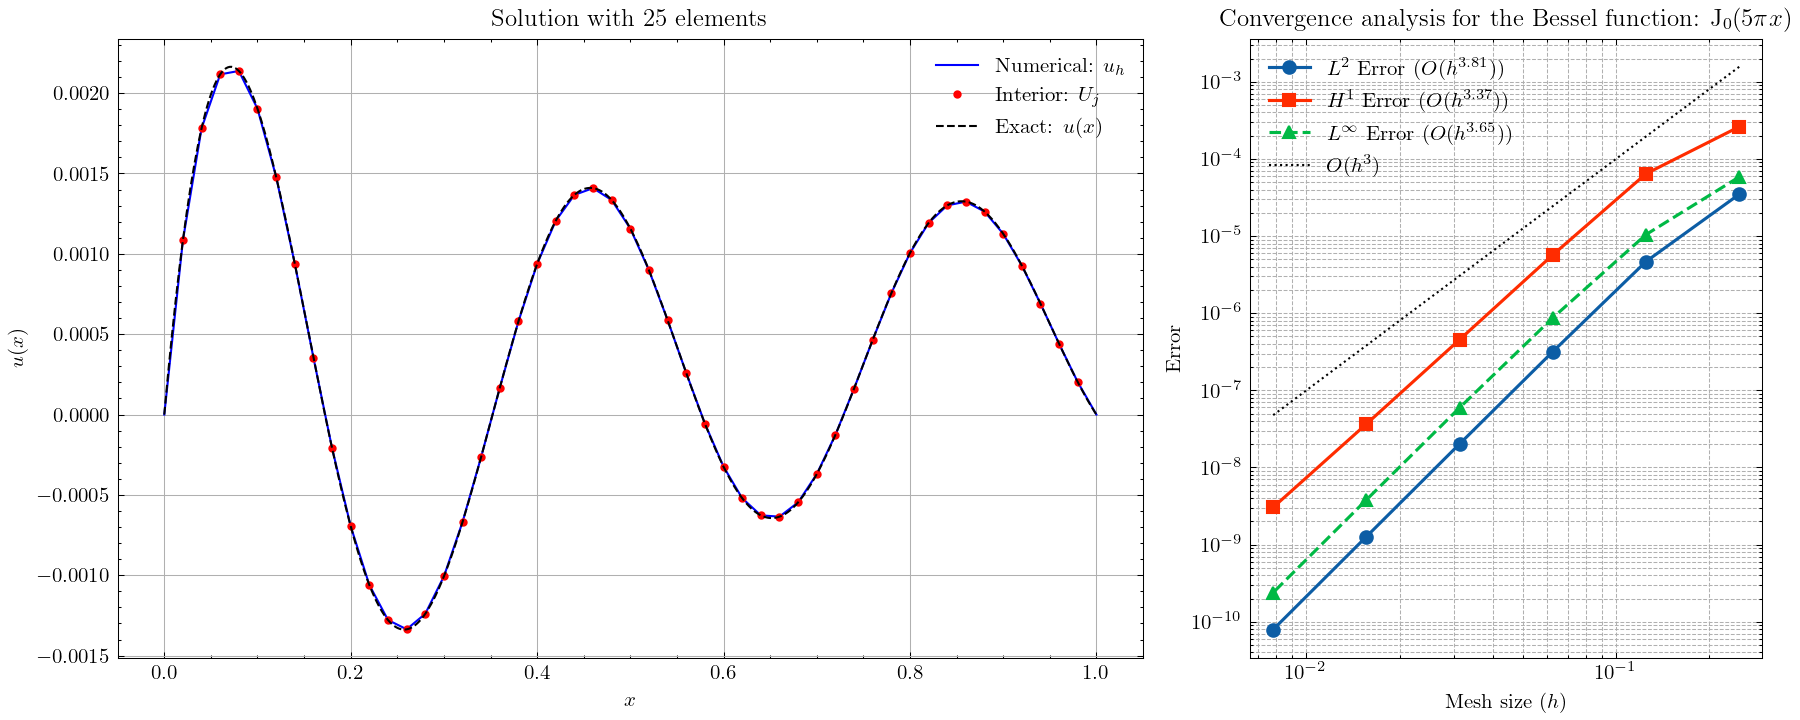


                                             CONVERGENCE ANALYSIS                                             
M        | h            | L² Error        | Rate     | L∞ Error        | Rate     | H¹ Error        | Rate    
---------+--------------+-----------------+----------+-----------------+----------+-----------------+---------
4        | 2.50e-01     | 3.48e-05        | --       | 5.84e-05        | --       | 2.61e-04        | --      
8        | 1.25e-01     | 4.67e-06        | 2.90     | 1.04e-05        | 2.48     | 6.42e-05        | 2.02    
16       | 6.25e-02     | 3.17e-07        | 3.88     | 8.72e-07        | 3.58     | 5.70e-06        | 3.49    
32       | 3.12e-02     | 2.02e-08        | 3.97     | 5.95e-08        | 3.87     | 4.54e-07        | 3.65    
64       | 1.56e-02     | 1.27e-09        | 3.99     | 3.80e-09        | 3.97     | 3.66e-08        | 3.63    
128      | 7.81e-03     | 7.93e-11        | 4.00     | 2.39e-10        | 3.99     | 3.04e-09        | 3.59    


In [4]:
# Define the complex problem with Bessel functions
def bessel_source(x):
    """Source term with Bessel function"""
    return special.jv(0, 5 * np.pi * x)

# Create a reference solution on a finer mesh
mesh_fine = Mesh1D(256, domain=(0, 1))
fine_solver = PoissonSolver(mesh_fine, bessel_source)
x_fine, u_fine = fine_solver.solve()

# Create solver using the common mesh for consistency
complex_solver = PoissonSolver(common_mesh, bessel_source)
x_complex, u_complex = complex_solver.get_full_solution()
x_complex_fine = np.linspace(0, 1, 256)
u_complex_fine = interp1d(x_complex, u_complex, kind='linear')(x_complex_fine)

# Define a reference solution function based on the fine mesh solution
def bessel_reference(x):
    x_valid = np.maximum(x, x_fine.min())
    x_valid = np.minimum(x_valid, x_fine.max())
    
    # Use interpolation for the valid range
    interp_func = interp1d(x_fine, u_fine, kind='cubic')
    result = interp_func(x_valid)
    
    result = np.where(np.isclose(x, 0.0), 0.0, result)
    result = np.where(np.isclose(x, 1.0), 0.0, result)
    
    return result

fig = convergence_analysis(bessel_source, bessel_reference, ns=[4, 8, 16, 32, 64, 128], 
                           title='Convergence analysis for the Bessel function: $\\mathrm{J_0}(5\\pi x)$', M=25)
fig.savefig('figures/convergence_complex.png', dpi=300, bbox_inches='tight')

print_convergence_table(PoissonSolver, bessel_reference, bessel_source, M_list=[4, 8, 16, 32, 64, 128])

Elements:   8 | h=1.25e-01 | L2: 1.78e-04 | H1: 2.14e-03 | Linf: 3.17e-04 | Orders: (first mesh)
Elements:  16 | h=6.25e-02 | L2: 1.19e-05 | H1: 1.86e-04 | Linf: 2.37e-05 | Orders: L2=3.91, H1=3.52, Linf=3.74
Elements:  32 | h=3.12e-02 | L2: 7.52e-07 | H1: 1.53e-05 | Linf: 1.51e-06 | Orders: L2=3.98, H1=3.61, Linf=3.97
Elements:  64 | h=1.56e-02 | L2: 4.72e-08 | H1: 1.27e-06 | Linf: 9.94e-08 | Orders: L2=3.99, H1=3.59, Linf=3.93
Elements: 128 | h=7.81e-03 | L2: 2.95e-09 | H1: 1.09e-07 | Linf: 6.36e-09 | Orders: L2=4.00, H1=3.55, Linf=3.97
Elements: 256 | h=3.91e-03 | L2: 1.84e-10 | H1: 9.40e-09 | Linf: 4.02e-10 | Orders: L2=4.00, H1=3.53, Linf=3.98
Elements: 512 | h=1.95e-03 | L2: 1.14e-11 | H1: 8.21e-10 | Linf: 2.53e-11 | Orders: L2=4.02, H1=3.52, Linf=3.99
Elements: 1024 | h=9.77e-04 | L2: 3.73e-12 | H1: 7.39e-11 | Linf: 7.37e-12 | Orders: L2=1.61, H1=3.47, Linf=1.78


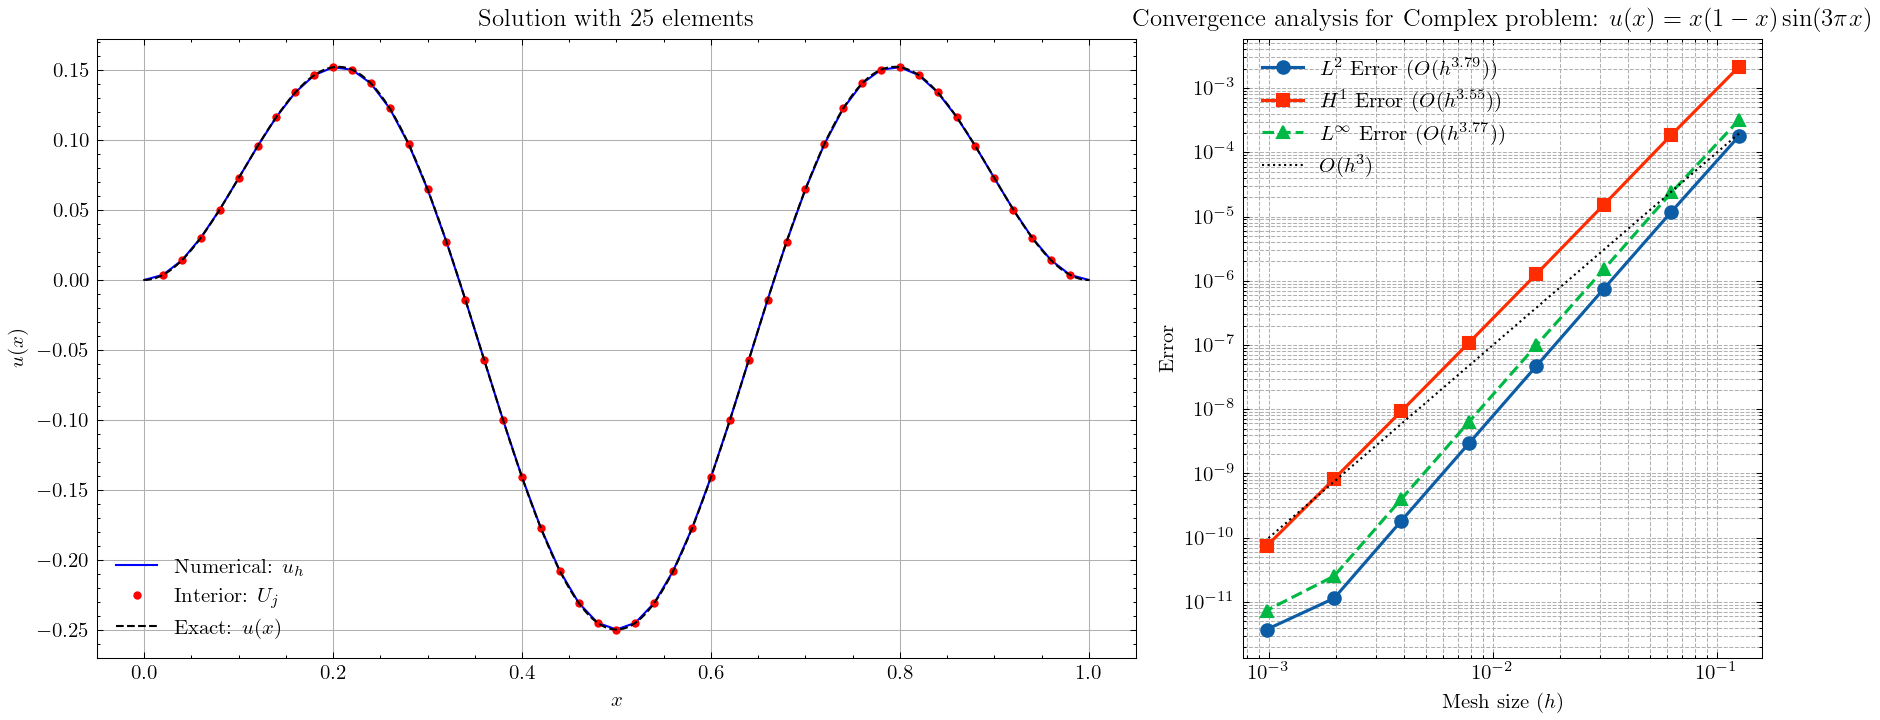

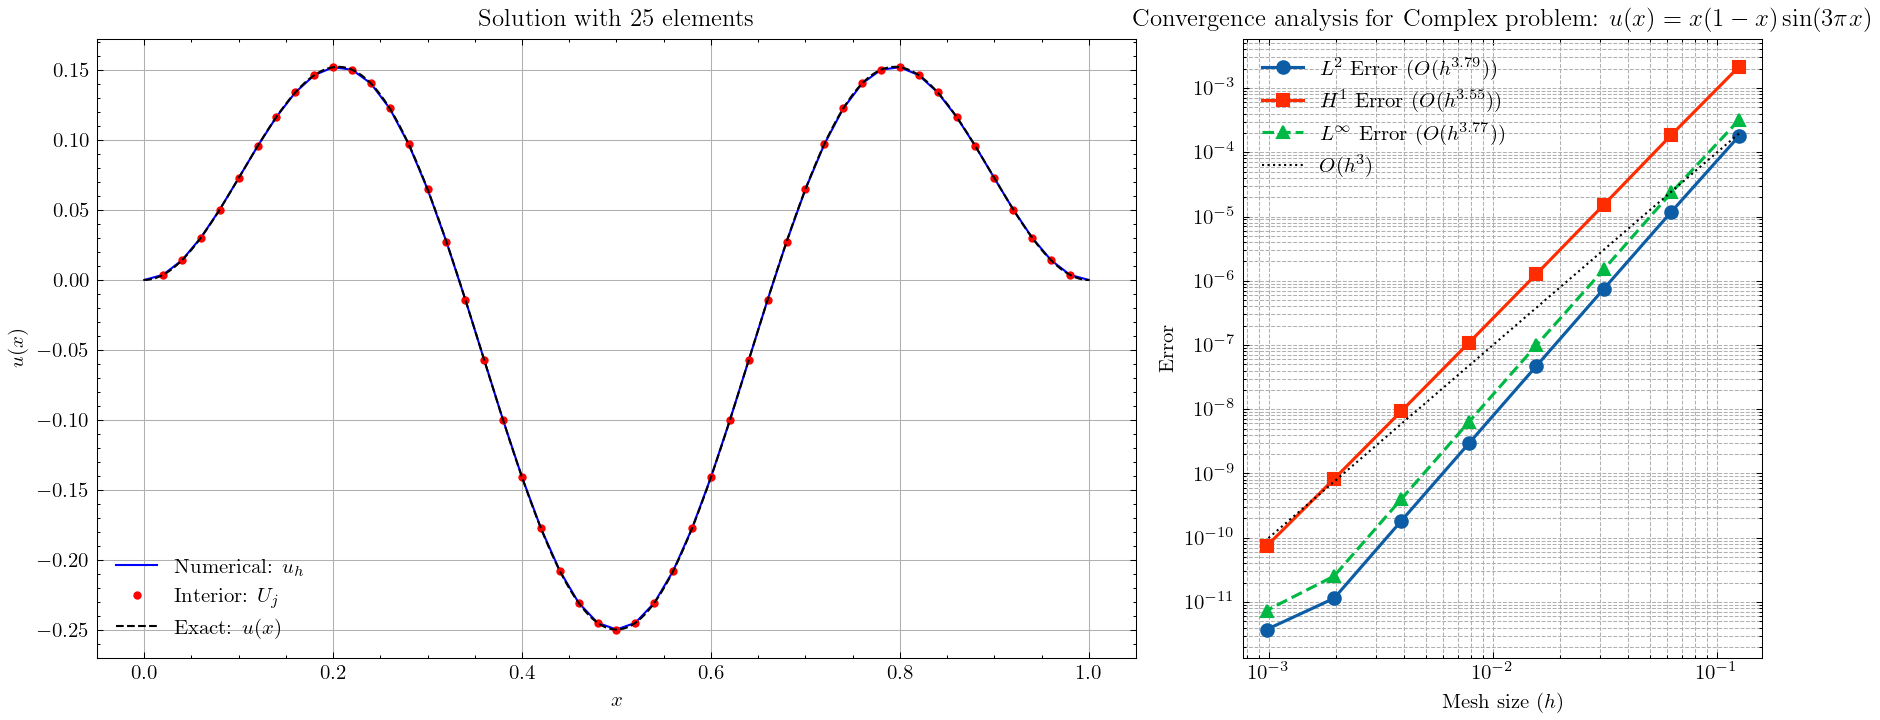

In [5]:
import sympy as sp

# Define symbolic variable
x = sp.Symbol('x')

# Define symbolic expressions
u1_sym = x*(1 - x) * sp.sin(3 * sp.pi * x)
du1_sym = sp.diff(u1_sym, x)
ddu1_sym = sp.diff(du1_sym, x)
f1_sym = -ddu1_sym  # since -u'' = f

# Lambdify these expressions to use with numpy
u1   = sp.lambdify(x, u1_sym, 'numpy')
du1  = sp.lambdify(x, du1_sym, 'numpy')
ddu1 = sp.lambdify(x, ddu1_sym, 'numpy')
f1   = sp.lambdify(x, f1_sym, 'numpy')

# Create a new mesh for the complex problem
mesh_complex = Mesh1D(256, domain=(0, 1))
complex_solver = PoissonSolver(mesh_complex, f1)

convergence_analysis(f1, u1, ns=[8, 16, 32, 64, 128, 256, 512, 1024],
                     title='Convergence analysis for Complex problem: $u(x) = x(1-x)\\sin(3\\pi x)$', M=25)

## Using Magic Methods to Combine Solutions

Now we'll demonstrate the powerful magic methods in TrymFEM to combine and manipulate solutions. 
Since all solvers are using the same mesh, they are compatible for addition and subtraction.

Simple solver mesh: Mesh1D(nelems=4, domain=(0, 1))
Smooth solver mesh: Mesh1D(nelems=4, domain=(0, 1))
Complex solver mesh: Mesh1D(nelems=256, domain=(0, 1))
Meshes are compatible: False


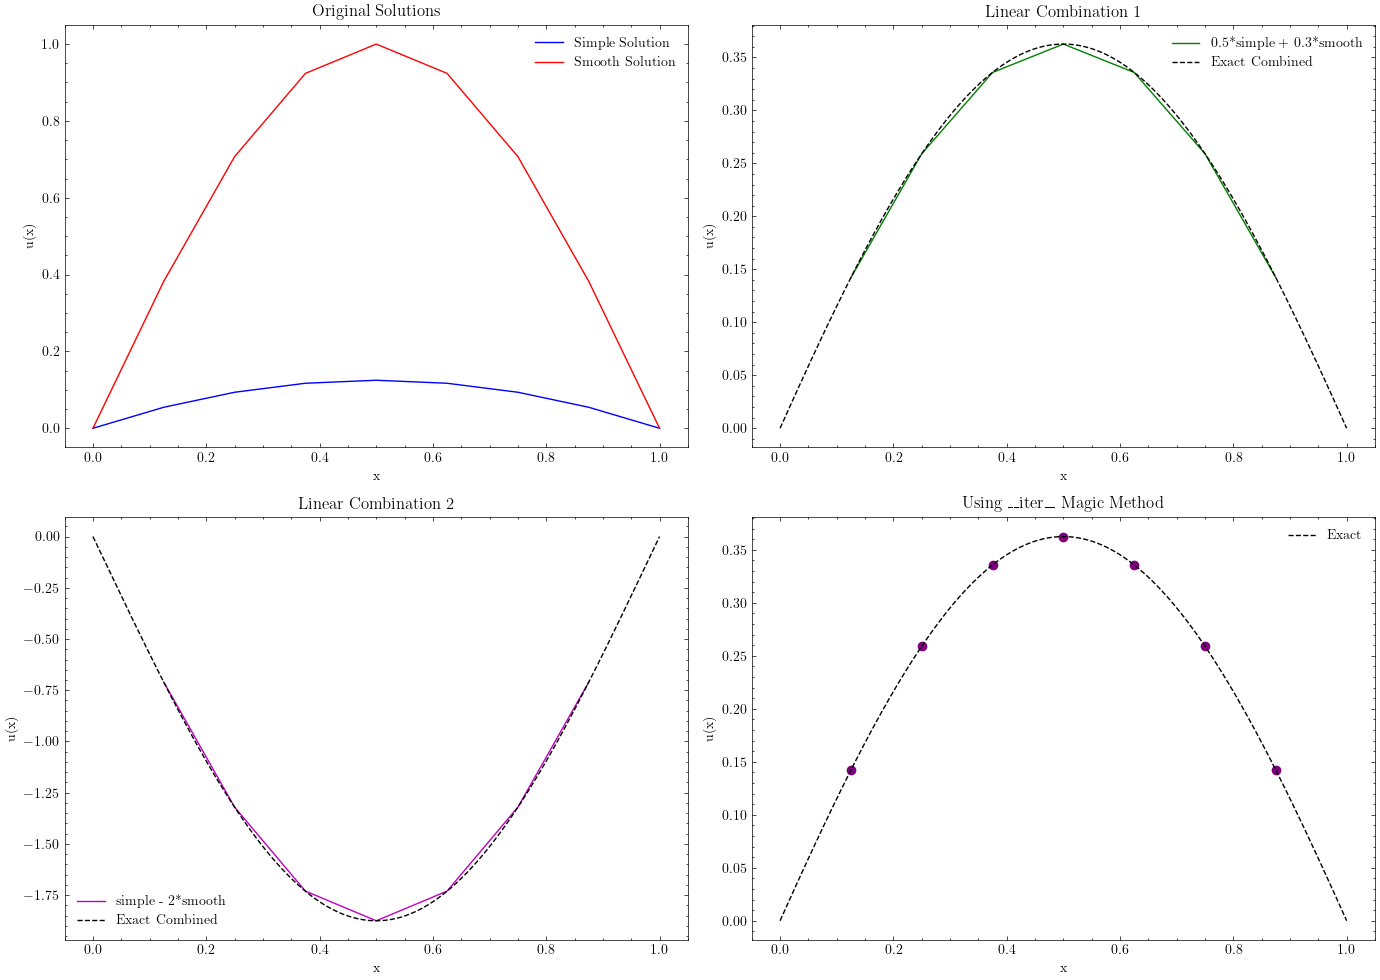

Errors for combined solutions:
Combination 1 (0.5*simple + 0.3*smooth) L2 Error: 2.81e-05
Combination 2 (simple - 2*smooth) L2 Error: 1.87e-04


In [6]:
# Confirm that meshes are compatible
print(f"Simple solver mesh: {simple_solver.mesh}")
print(f"Smooth solver mesh: {smooth_solver.mesh}")
print(f"Complex solver mesh: {complex_solver.mesh}")
print(f"Meshes are compatible: {simple_solver.mesh == smooth_solver.mesh == complex_solver.mesh}")

# Create combined solutions using magic methods
# 1. Linear combination: 0.5 * simple + 0.3 * smooth
combined_solver1 = 0.5 * simple_solver + 0.3 * smooth_solver
x_comb1, u_comb1 = combined_solver1.solve()

# 2. More complex combination: simple - 2 * smooth
combined_solver2 = simple_solver - 2 * smooth_solver
x_comb2, u_comb2 = combined_solver2.solve()

# 3. Compute exact combined solutions for validation
def combined_exact1(x):
    return 0.5 * simple_exact(x) + 0.3 * sin_exact(x)

def combined_exact2(x):
    return simple_exact(x) - 2 * sin_exact(x)

# Visualize the combined solutions
plt.figure(figsize=(14, 10))

plt.subplot(2, 2, 1)
plt.plot(x_simple, u_simple, 'b-', label='Simple Solution')
plt.plot(x_smooth, u_smooth, 'r-', label='Smooth Solution')
plt.title('Original Solutions')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x_comb1, u_comb1, 'g-', label='0.5*simple + 0.3*smooth')
x_dense = np.linspace(0, 1, 500)
plt.plot(x_dense, combined_exact1(x_dense), 'k--', label='Exact Combined')
plt.title('Linear Combination 1')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x_comb2, u_comb2, 'm-', label='simple - 2*smooth')
plt.plot(x_dense, combined_exact2(x_dense), 'k--', label='Exact Combined')
plt.title('Linear Combination 2')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

# Use iteration magic method to extract points directly
plt.subplot(2, 2, 4)
x_points, u_points = zip(*list(combined_solver1))
plt.scatter(x_points, u_points, c='purple', marker='o', label='__iter__ points')
plt.plot(x_dense, combined_exact1(x_dense), 'k--', label='Exact')
plt.title('Using __iter__ Magic Method')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()

plt.tight_layout()
plt.show()

# Compute errors for the combined solutions
error1_L2 = compute_error(x_comb1, u_comb1, combined_exact1, 'L2')
error2_L2 = compute_error(x_comb2, u_comb2, combined_exact2, 'L2')

print(f"Errors for combined solutions:")
print(f"Combination 1 (0.5*simple + 0.3*smooth) L2 Error: {error1_L2:.2e}")
print(f"Combination 2 (simple - 2*smooth) L2 Error: {error2_L2:.2e}")

## Creating a Fourth Problem with Combined Solutions

As a final demonstration, we'll create a fourth, more complex problem by combining all three previous solutions.

In [7]:
# Create a fourth problem combining all three previous ones
combined_final = 0.7 * simple_solver - 1.2 * smooth_solver + 0.5 * complex_solver
x_final, u_final = combined_final.solve()

# Exact solution for the parts that have analytical solutions
def partial_exact(x):
    return 0.7 * simple_exact(x) - 1.2 * sin_exact(x)

# For the complex part, we'll use the reference solution
u_complex_interp = interp1d(x_complex, u_complex, kind='cubic')

# Visualize the final complex solution
plt.figure(figsize=(14, 8))

plt.subplot(2, 1, 1)
plt.plot(x_final, u_final, 'b-', linewidth=2, label='Combined Solution')
plt.title('Complex Combined Solution: 0.7*simple - 1.2*smooth + 0.5*complex')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

# Plot the component solutions for comparison
plt.subplot(2, 1, 2)
plt.plot(x_simple, 0.7 * u_simple, 'g-', alpha=0.7, label='0.7 * Simple')
plt.plot(x_smooth, -1.2 * u_smooth, 'r-', alpha=0.7, label='-1.2 * Smooth')
plt.plot(x_complex, 0.5 * u_complex, 'y-', alpha=0.7, label='0.5 * Complex')
plt.title('Component Solutions')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("\nFinal complex combined solution created using dunder methods")
print(f"Number of DOFs: {len(combined_final)}")
print("Example access using iteration:")
for i, (xi, ui) in enumerate(combined_final):
    if i % 2 == 0:  # Print every other point for brevity
        print(f"x = {xi:.4f}, u = {ui:.8f}")

ValueError: Solvers must have compatible meshes

## Enhanced Convergence Study for the Smooth Problem

Let's use our enhanced visualization tools to study the convergence behavior of the smooth problem

In [ ]:
# Run the enhanced convergence visualization
plot_enhanced_convergence(
    sin_source, 
    sin_exact, 
    ns=[4, 8, 16, 32, 64], 
    norm='L2', 
    title='Sine Problem Convergence Analysis'
)

# Plot the spatial distribution of error
plot_error_distribution(sin_source, sin_exact, n=16)

NameError: name 'plot_enhanced_convergence' is not defined

## Conclusion

In this notebook, we've demonstrated the capabilities of the TrymFEM library by:

1. Solving three different PDEs with varying complexity
2. Leveraging the library's magic methods to manipulate solutions
3. Creating combined solutions that demonstrate the full power of the implementation
4. Analyzing errors and convergence rates
5. Using enhanced visualization tools to understand error distribution

The library's object-oriented design and operator overloading make it a powerful tool for numerical simulations in finite element analysis.

**Key insight:** When using magic methods like `__add__` and `__sub__` to combine solvers, they must have compatible meshes (same number of elements and domain), otherwise we get a ValueError.